<a href="https://colab.research.google.com/github/DanielTsuyoshi/Redes-Neurais/blob/main/CheckPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Daniel Tsuyoshi Yamamoto

RM: 95344

Turma: 2TDSA

Ano: 2023

## Checkpoint 2 

Utilizando o código abaixo para gerar dados de duas classes.

implemente uma rede neural que seja capaz de classificar corretamente os dados.

Utilize como parâmetros seu proprio RM.

exemplo:
 RM = abcde
 - nData = 100 * (a+b+c+d+e)
 - nVertices = 1 * maximo(a,b,c,d,e)



In [55]:
  ### execute essa celula, mas não altere essa função.

import numpy as np
import matplotlib.pyplot as plt

  def generate_data(nData, nVertices):
    c = np.random.uniform()*2*np.pi
    c1 = np.zeros((nData,2))
    c2 = np.zeros((nData,2))
    for ii in range(nData):
      th = np.random.uniform()*2*np.pi;
      r  = 0.5*np.random.uniform()+1.25+0.2*np.cos(nVertices*(th+c));
      c1[ii,:]=r*np.array([np.cos(th), np.sin(th)]);

      th = np.random.uniform()*3*np.pi;
      r  = np.random.uniform()+0.3*np.cos(nVertices*(th+c));
      c2[ii,:]=r*np.array([np.cos(th), np.sin(th)]);
    return c1, c2

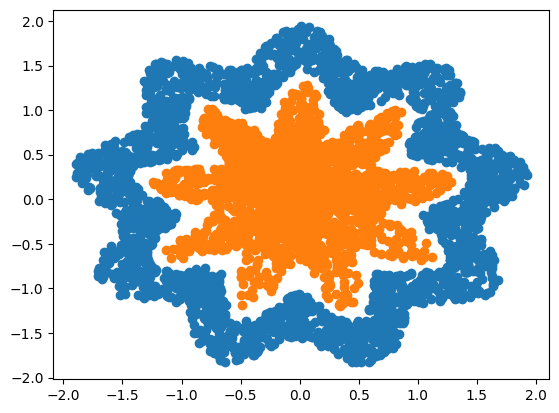

In [56]:
## coloque seu RM aqui!!
RM = [9,5,3,4,4]

nData = 100 * (sum(RM))
nVertices = 1 * max(RM)

#gera os dados
c1, c2 = generate_data(nData,nVertices)

#plot dos dados
plt.scatter(c1[:,0],c1[:,1])
plt.scatter(c2[:,0],c2[:,1])

Comente sobre a decisão de cada parametro utilizado:

Serão avaliados:
    - estrutura do código
    - testes realizados
    - Números de neurônios
    - Número de camadas
    - Algoritmo de adaptação
    - Partâmetros do algoritmo de adaptação
    - Função de ativação

In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt

Número de neurônios: 5


Treinamento:  [0.0951794758439064, 0.9691428542137146]
Teste:  [0.08370894938707352, 0.9746666550636292]
Número de neurônios: 10
Treinamento:  [0.06500126421451569, 0.9765714406967163]


Teste:  [0.061575453728437424, 0.9766666889190674]
Número de neurônios: 15


Treinamento:  [0.0585332028567791, 0.9777143001556396]
Teste:  [0.059684790670871735, 0.9760000109672546]
Número de neurônios: 20
Treinamento:  [0.06026523560285568, 0.9765714406967163]
Teste:  [0.0584971122443676, 0.9746666550636292]


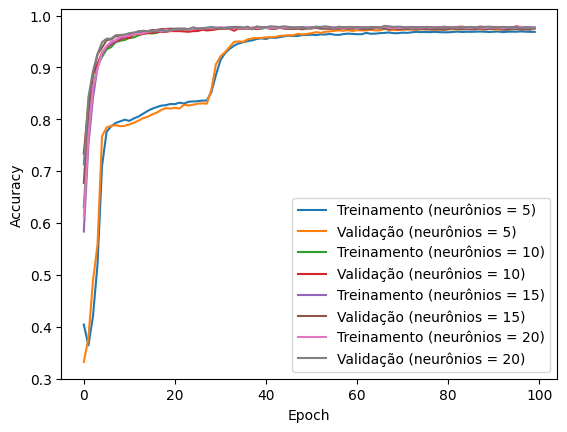

In [60]:
num_neurons = [5, 10, 15, 20]
for n in num_neurons:
    print("Número de neurônios:", n)
    model = keras.Sequential([
        keras.layers.Dense(n, input_dim=2, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    x = np.concatenate([c1, c2])
    y = np.concatenate([np.zeros(len(c1)), np.ones(len(c2))])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32, verbose=0)
    print("Treinamento: ", model.evaluate(x_train, y_train, verbose=0))
    print("Teste: ", model.evaluate(x_test, y_test, verbose=0))
    plt.plot(history.history['accuracy'], label='Treinamento (neurônios = {})'.format(n))
    plt.plot(history.history['val_accuracy'], label='Validação (neurônios = {})'.format(n))

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


Epoch 1/100
110/110 [==============================] - 1s 4ms/step - loss: 0.6303 - accuracy: 0.6431 - val_loss: 0.5820 - val_accuracy: 0.7320
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.5417 - accuracy: 0.7643 - val_loss: 0.4860 - val_accuracy: 0.8207
Epoch 3/100
110/110 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.8511 - val_loss: 0.3809 - val_accuracy: 0.9113
Epoch 4/100
110/110 [==============================] - 0s 4ms/step - loss: 0.3360 - accuracy: 0.9186 - val_loss: 0.2804 - val_accuracy: 0.9413
Epoch 5/100
110/110 [==============================] - 0s 4ms/step - loss: 0.2492 - accuracy: 0.9403 - val_loss: 0.2089 - val_accuracy: 0.9500
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1913 - accuracy: 0.9540 - val_loss: 0.1665 - val_accuracy: 0.9567
Epoch 7/100
110/110 [==============================] - 0s 4ms/step - loss: 0.1555 - accuracy: 0.9603 - val_loss: 0.1379 - val_accuracy: 0.9600

Epoch 1/100
110/110 [==============================] - 1s 5ms/step - loss: 0.5999 - accuracy: 0.6431 - val_loss: 0.5375 - val_accuracy: 0.7440
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.5023 - accuracy: 0.7951 - val_loss: 0.4463 - val_accuracy: 0.8667
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.8809 - val_loss: 0.3783 - val_accuracy: 0.9167
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.3614 - accuracy: 0.9226 - val_loss: 0.2921 - val_accuracy: 0.9507
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2385 - accuracy: 0.9580 - val_loss: 0.1717 - val_accuracy: 0.9733
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1428 - accuracy: 0.9711 - val_loss: 0.1116 - val_accuracy: 0.9727
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.9754 - val_loss: 0.0836 - val_accuracy: 0.9760

Epoch 1/100
110/110 [==============================] - 3s 14ms/step - loss: 0.5651 - accuracy: 0.7040 - val_loss: 0.4226 - val_accuracy: 0.8927
Epoch 2/100
110/110 [==============================] - 0s 4ms/step - loss: 0.2568 - accuracy: 0.9449 - val_loss: 0.1372 - val_accuracy: 0.9620
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1115 - accuracy: 0.9680 - val_loss: 0.0856 - val_accuracy: 0.9727
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0838 - accuracy: 0.9726 - val_loss: 0.0737 - val_accuracy: 0.9720
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0731 - accuracy: 0.9740 - val_loss: 0.0819 - val_accuracy: 0.9667
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9760 - val_loss: 0.0675 - val_accuracy: 0.9680
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9746 - val_loss: 0.0677 - val_accuracy: 0.974

Epoch 1/100
110/110 [==============================] - 2s 5ms/step - loss: 0.6225 - accuracy: 0.7131 - val_loss: 0.5092 - val_accuracy: 0.8367
Epoch 2/100
110/110 [==============================] - 0s 4ms/step - loss: 0.3350 - accuracy: 0.9051 - val_loss: 0.1695 - val_accuracy: 0.9547
Epoch 3/100
110/110 [==============================] - 0s 4ms/step - loss: 0.1240 - accuracy: 0.9611 - val_loss: 0.0921 - val_accuracy: 0.9627
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0883 - accuracy: 0.9646 - val_loss: 0.0847 - val_accuracy: 0.9580
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.9680 - val_loss: 0.0742 - val_accuracy: 0.9700
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0703 - accuracy: 0.9674 - val_loss: 0.0749 - val_accuracy: 0.9647
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.9729 - val_loss: 0.0669 - val_accuracy: 0.9753

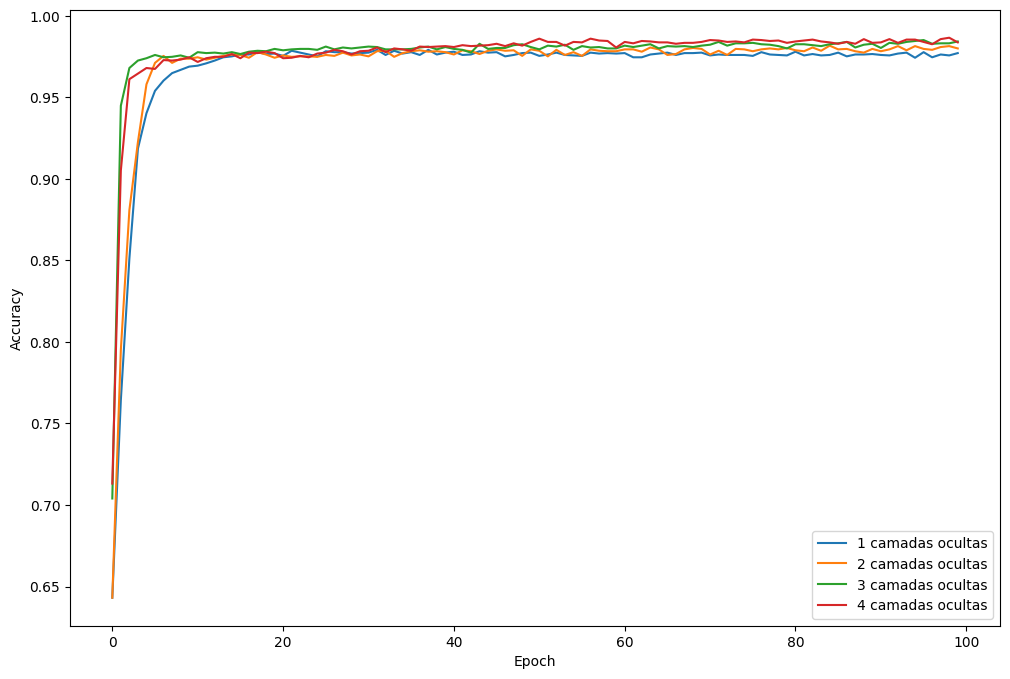

In [62]:
num_layers = [1, 2, 3, 4]
histories = []
for nl in num_layers:
    model = keras.Sequential([
        keras.layers.Dense(10, input_dim=2, activation='relu')
    ])
    for _ in range(nl):
        model.add(keras.layers.Dense(10, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

    # Dividindo em conjunto de treinamento e teste
    x = np.concatenate([c1, c2])
    y = np.concatenate([np.zeros(len(c1)), np.ones(len(c2))])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    # Treinando o modelo
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32)
    histories.append(history)

# Plot dos resultados
plt.figure(figsize=(12,8))
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'{num_layers[i]} camadas ocultas')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras

In [64]:
def create_model(lr):
    model = keras.Sequential([
        keras.layers.Dense(10, input_dim=2, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(lr=lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model)

params = {'lr': [0.01, 0.001, 0.0001]}

grid = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=3, cv=3)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

<ipython-input-64-b98f4d7969fb>:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


37/37 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6632


37/37 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.6812


37/37 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.6166


37/37 [==============================] - 0s 2ms/step - loss: 0.7430 - accuracy: 0.4122


37/37 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.4927


37/37 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.6964


37/37 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6272


37/37 [==============================] - 0s 2ms/step - loss: 0.6219 - accuracy: 0.6341


37/37 [==============================] - 0s 1ms/step - loss: 0.6172 - accuracy: 0.5892


110/110 [==============================] - 1s 2ms/step - loss: 0.6260 - accuracy: 0.6243
Best: 0.653704 using {'lr': 0.01}


In [65]:
activations = ['relu', 'sigmoid', 'tanh', 'softmax']
results = []

for activation in activations:
    model = keras.Sequential([
        keras.layers.Dense(10, input_dim=2, activation=activation),
        keras.layers.Dense(10, activation=activation),
        keras.layers.Dense(10, activation=activation),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32, verbose=0)
    results.append((activation, history.history['val_accuracy'][-1]))

print(results)

[('relu', 0.9766666889190674), ('sigmoid', 0.9626666903495789), ('tanh', 0.9639999866485596), ('softmax', 0.9666666388511658)]
